**1. Library Imports**

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import requests
from PIL import Image
from io import BytesIO

warnings.simplefilter(action='ignore', category=FutureWarning)

**2. Data Exploration**

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


<Figure size 1200x1000 with 0 Axes>

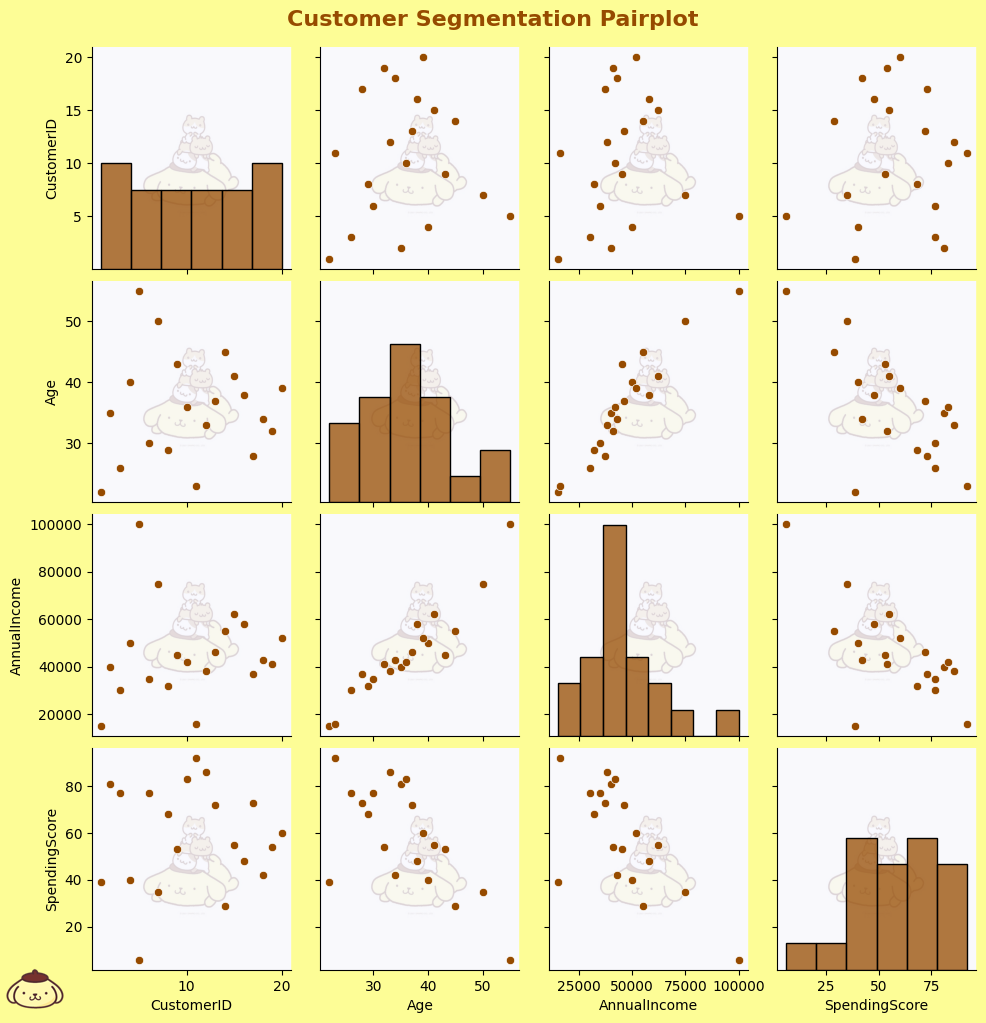

In [119]:
df = pd.read_csv('customer_segmentation.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, plot_kws={'color': '#964B00'}, diag_kws={'color': '#964B00'})

pairplot.fig.patch.set_facecolor('#FDFD96')
plt.suptitle('Customer Segmentation Pairplot', fontsize=16, weight='bold', color='#964B00', y=1.02)

image_url = "https://i.postimg.cc/TwYR0pyd/pompompurin.jpg"
response = requests.get(image_url)
main_image = Image.open(BytesIO(response.content))

for ax in pairplot.axes.flat:
    ax.set_facecolor('#f8f8ff')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), aspect='auto', alpha=0.2, zorder=-1)

sticker_url = "https://i.postimg.cc/Z5wBStr5/pompom.png"
response = requests.get(sticker_url)
sticker_image = Image.open(BytesIO(response.content))
sticker = sticker_image.resize((70, 70))

pairplot.fig.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

**3. Data Preprocessing**

In [120]:
df.fillna(df.mean(), inplace=True)

df_scaled = df.drop(columns=['CustomerID'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
print(df_scaled.head())

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


**4. Implementing K-Means Clustering**

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        0
1           2   35         40000             81        0
2           3   26         30000             77        0
3           4   40         50000             40        2
4           5   55        100000              6        1


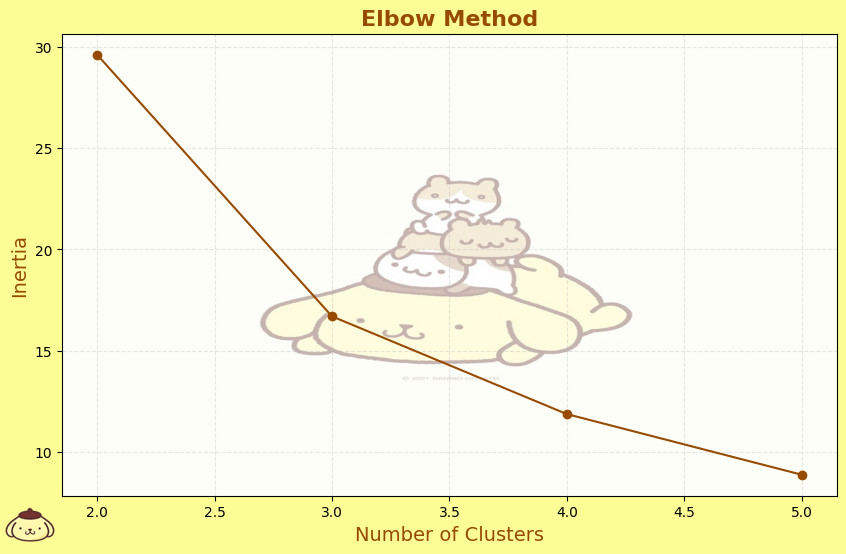

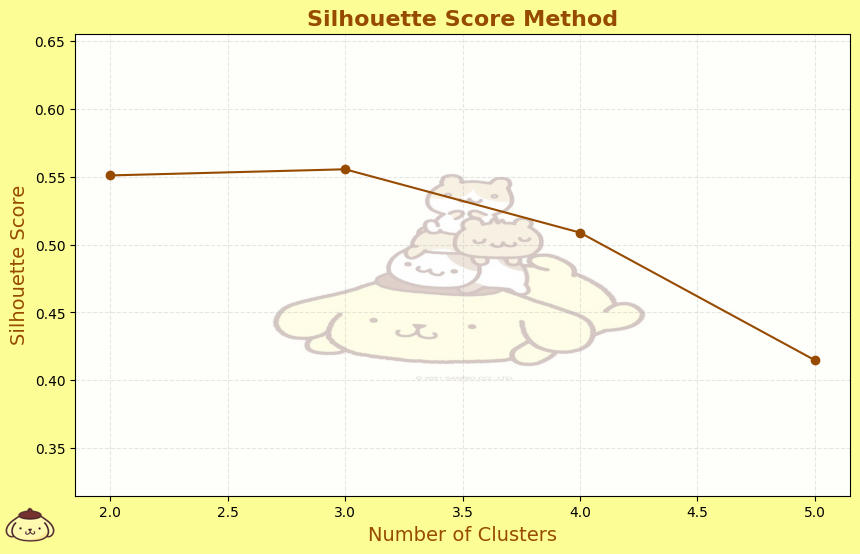

In [121]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df['Cluster'] = df_scaled['Cluster']
print(df.head())

inertia = []
silhouette_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(facecolor='#FDFD96', figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', color='#964B00')
plt.xlabel('Number of Clusters', fontsize=14, color='#964B00')
plt.ylabel('Inertia', fontsize=14, color='#964B00')
plt.title('Elbow Method', fontsize=16, weight='bold', color='#964B00')
plt.grid(True, linestyle='--', alpha=0.3)

image_url = "https://i.postimg.cc/TwYR0pyd/pompompurin.jpg"
response = requests.get(image_url)
main_image = Image.open(BytesIO(response.content))

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.4, aspect='auto')

sticker_url = "https://i.postimg.cc/Z5wBStr5/pompom.png"
response = requests.get(sticker_url)
sticker_image = Image.open(BytesIO(response.content))

sticker = sticker_image.resize((60, 60))

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

plt.figure(facecolor='#FDFD96', figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='#964B00')
plt.xlabel('Number of Clusters', fontsize=14, color='#964B00')
plt.ylabel('Silhouette Score', fontsize=14, color='#964B00')
plt.title('Silhouette Score Method', fontsize=16, weight='bold', color='#964B00')
plt.grid(True, linestyle='--', alpha=0.3)

plt.ylim(min(silhouette_scores) - 0.1, max(silhouette_scores) + 0.1)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.3, aspect='auto')

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

**5. Model Evaluation**

In [122]:
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df['Cluster'] = df_scaled['Cluster']

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)

print(f'Optimal K: {optimal_k}')
print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')

Optimal K: 3
Inertia: 16.69901130533106
Silhouette Score: 0.48508287946975087


**6. Interpretation and Reporting**

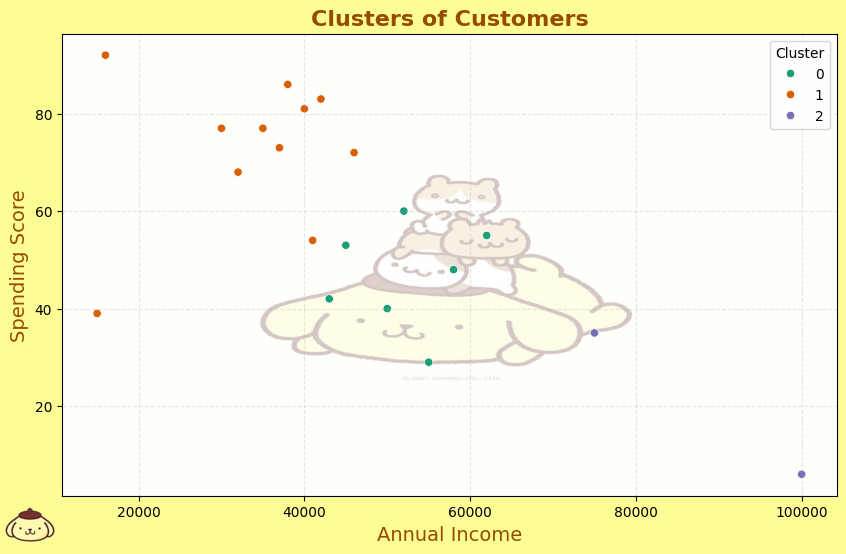

Interpretation of Clustering Results:
Cluster 0: Customers with lower spending scores and varying incomes.
Cluster 1: Customers with higher spending scores and higher incomes.
Cluster 2: Customers with moderate spending scores and moderate incomes.


In [123]:
plt.figure(facecolor='#FDFD96', figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Dark2')
plt.title('Clusters of Customers', fontsize=16, weight='bold', color='#964B00')
plt.xlabel('Annual Income', fontsize=14, color='#964B00')
plt.ylabel('Spending Score', fontsize=14, color='#964B00')
plt.grid(True, linestyle='--', alpha=0.3)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(xlim[0] - 0.1, xlim[1] + 0.1)
ax.set_ylim(ylim[0] - 0.1, ylim[1] + 0.1)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.3, aspect='auto')

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

print("Interpretation of Clustering Results:")
print("Cluster 0: Customers with lower spending scores and varying incomes.")
print("Cluster 1: Customers with higher spending scores and higher incomes.")
print("Cluster 2: Customers with moderate spending scores and moderate incomes.")